In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import statsmodels.formula.api as sfa
from statsmodels.graphics.regressionplots import influence_plot as ip

In [3]:
st_up = pd.read_csv("D:/DS Files/DS Assingments/Assignments/ASSIGNMENTS EXCEL SHEETS/50_startups.csv")

In [4]:
st_up.head()

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
st_up.isna().sum()

Spend             0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [6]:
st_up.corr()

,Spend,Administration,MarketingSpend,Profit
Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
st_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Spend           50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


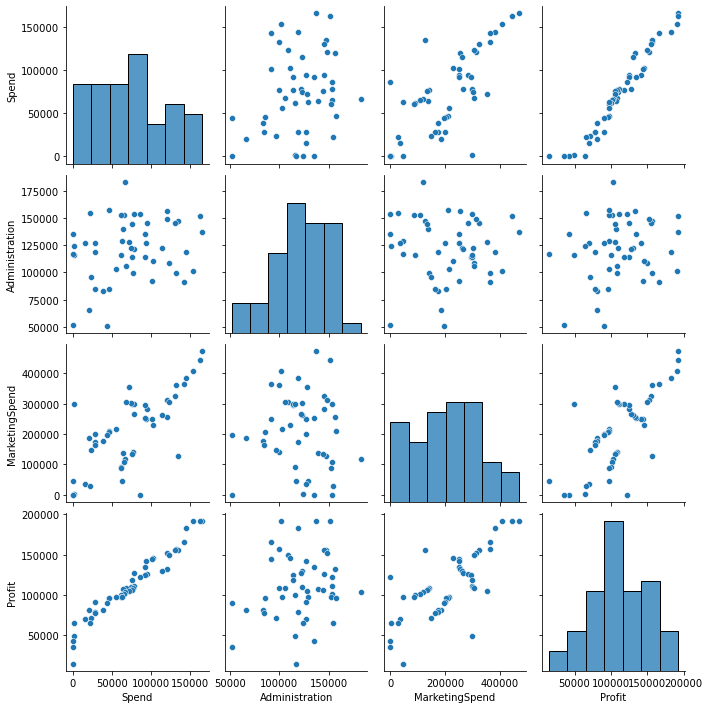

In [8]:
sb.pairplot(st_up)

In [9]:
#buliding the model 
model=sfa.ols('Profit~Spend+Administration+MarketingSpend',data = st_up).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 15 May 2022   Prob (F-statistic):           4.53e-30
Time:                        14:22:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Spend              0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model.params

Intercept         50122.192990
Spend                 0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [11]:
(model.pvalues,'\n',model.tvalues)

(Intercept         1.057379e-09
 Spend             2.634968e-22
 Administration    6.017551e-01
 MarketingSpend    1.047168e-01
 dtype: float64,
 '\n',
 Intercept          7.626218
 Spend             17.846374
 Administration    -0.525507
 MarketingSpend     1.655077
 dtype: float64)

In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
#BULIDING SIMPLE LINER REGRESSION 
p_sp = sfa.ols('Profit~Spend',data = st_up).fit()
(p_sp.pvalues,'\n',p_sp.tvalues)
p_sp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.50e-32
Time:                        14:22:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
Spend          0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#CALCULATION VIF
r_sp = sfa.ols('Spend~Administration+MarketingSpend',data = st_up).fit().rsquared
vif_sp = 1/(1-r_sp)
vif_sp

2.4689030699947017

In [15]:
r_ad = sfa.ols('Administration~Spend+MarketingSpend',data = st_up).fit().rsquared
vif_ad = 1/(1-r_ad)
vif_ad

1.1750910070550453

In [16]:
r_ms = sfa.ols('MarketingSpend~Spend+Administration',data = st_up).fit().rsquared
vif_ms = 1/(1-r_ms)
vif_ms

2.3267732905308773

In [17]:
#STRORING VIF VALUES IN A DATAFRAME
id = {'Name':['Spend','Administration','MarketingSpend'],'Vif':[vif_sp,vif_ad,vif_ms]}
id_1 = pd.DataFrame(id)
id_1

,Name,Vif
0,Spend,2.468903
1,Administration,1.175091
2,MarketingSpend,2.326773


In [18]:
#CALC RESIDUAL VALUES
res = model.resid
res

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [19]:
res.mean()

7.872586138546467e-11

In [20]:
def get_standardized_values(x):
    return ((x-x.mean())/x.std())

<function matplotlib.pyplot.show(close=None, block=None)>

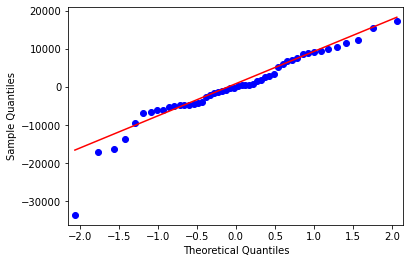

In [21]:
import statsmodels.api as sta
qq_plot = sta.qqplot(model.resid,line = 'q')
plt.show

In [22]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

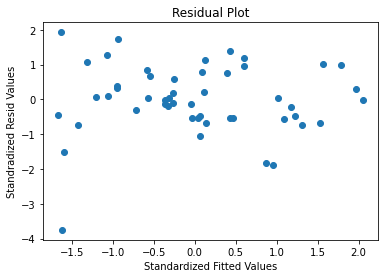

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standradized Resid Values")
plt.show()

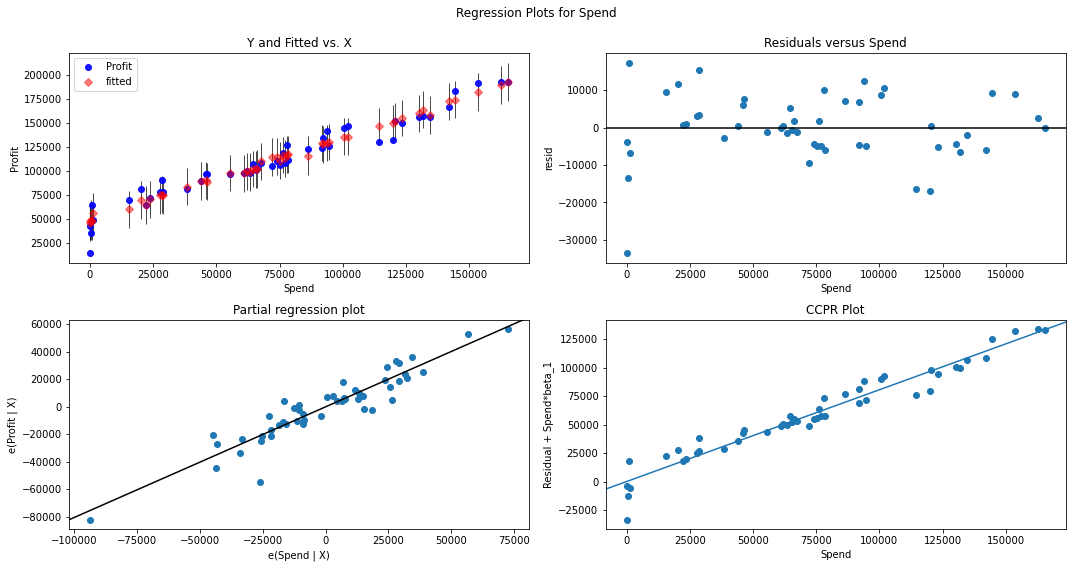

In [24]:
#regressor
a = plt.figure(figsize=(15,8))
a = sta.graphics.plot_regress_exog(model , 'Spend', fig = a)
plt.show()

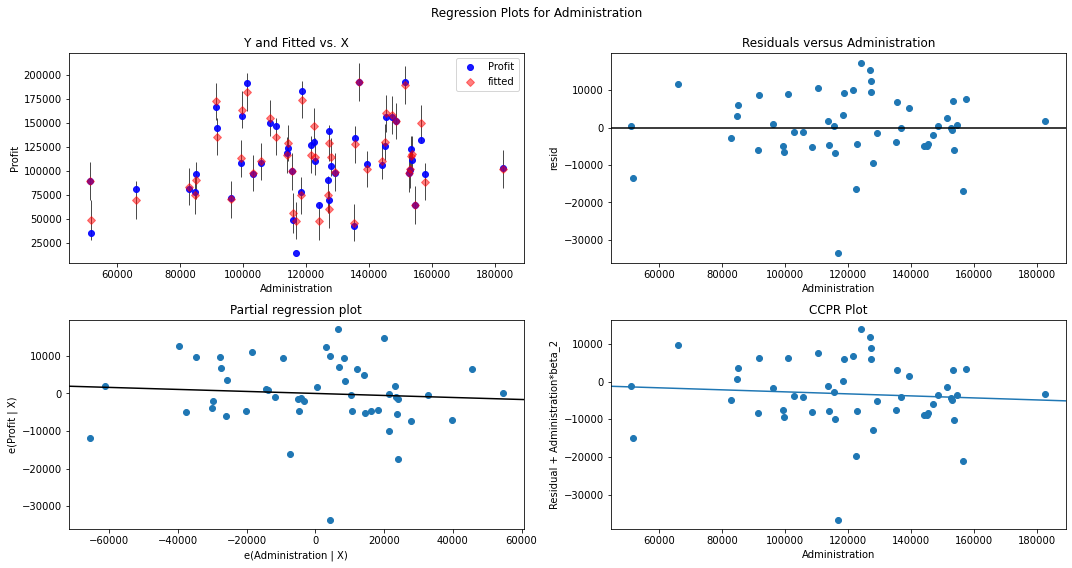

In [25]:
b = plt.figure(figsize=(15,8))
b = sta.graphics.plot_regress_exog(model,"Administration",fig = b)
plt.show()

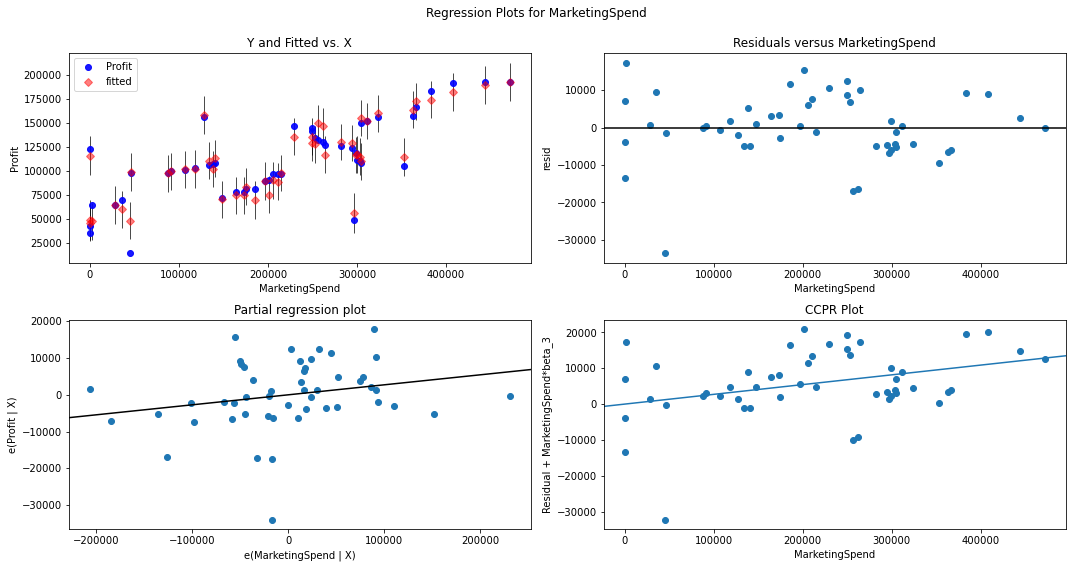

In [26]:
c = plt.figure(figsize=(15,8))
c= sta.graphics.plot_regress_exog(model,'MarketingSpend',fig = c)
plt.show()

In [27]:
#calc cooks distance and identifying outliers
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

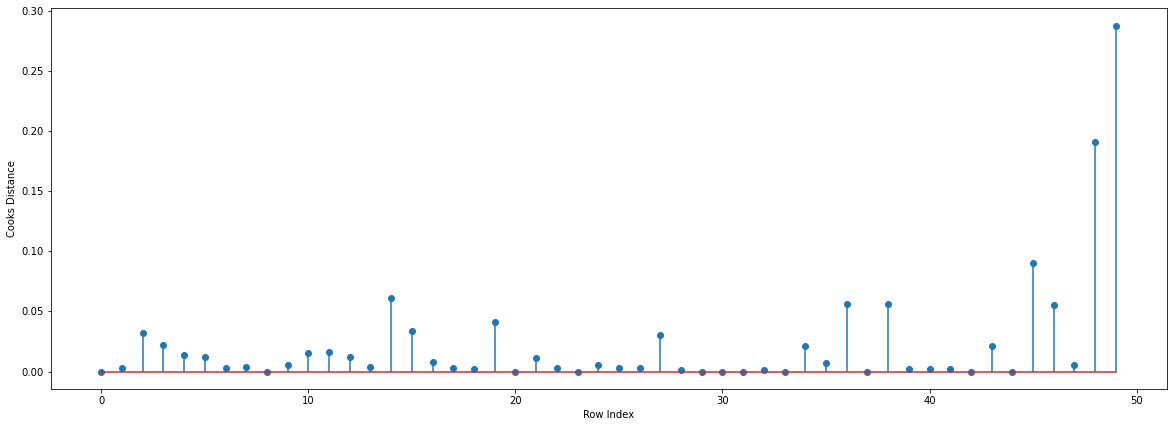

In [28]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(st_up)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cooks Distance")
plt.show()

In [29]:
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

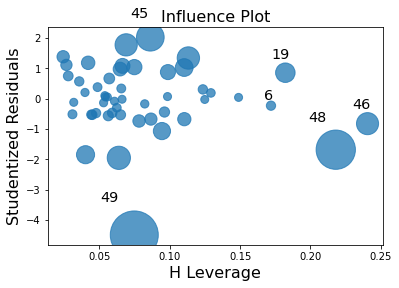

In [30]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot as ip
ip(model)
plt.show() #49th record is influence record

In [31]:
#levarage cutoff
k = st_up.shape[1]
n = st_up.shape[0]
lev_cutoff = 3*((k+1)/n)
lev_cutoff

0.36

In [32]:
st_up[st_up.index.isin([48,49])]

,Spend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [33]:
st_up1 = pd.read_csv("D:/DS Files/DS Assingments/Assignments/ASSIGNMENTS EXCEL SHEETS/50_startups.csv")

In [34]:
st_up_new = st_up1.drop(st_up1.index[[48,49]],axis=0).reset_index()
st_up_new


,index,Spend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
st_up_new = st_up_new.drop(['index'],axis = 1)

In [36]:
st_up_new

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
#final model
fin_sp_p = sfa.ols("Profit~Spend+MarketingSpend+Administration",data = st_up_new).fit()


In [38]:
(fin_sp_p.rsquared,fin_sp_p.aic)

(0.9626766170294073, 994.6690439260116)

In [39]:
model_influence_sp = fin_sp_p.get_influence()
(c_sp,_)= model_influence_sp.cooks_distance

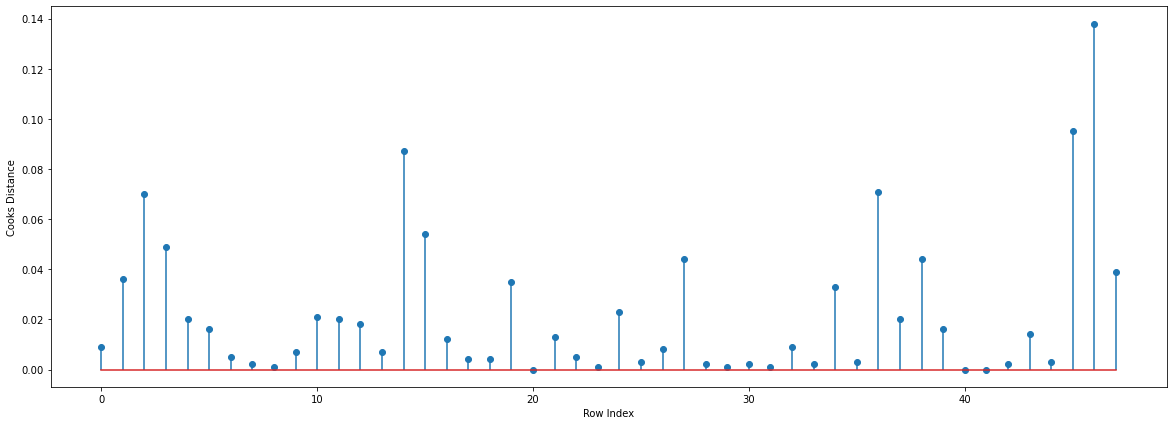

In [40]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(st_up_new)),np.round(c_sp,3))
plt.xlabel('Row Index')
plt.ylabel("Cooks Distance")
plt.show()

In [41]:
np.argmax(c_sp),np.max(c_sp)

(46, 0.13829133994335294)

In [42]:
st_up_new1 = st_up_new.drop(st_up1.index[[46,14]],axis=0).reset_index()
st_up_new1

,index,Spend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
st_up_new2 = st_up_new1.drop(['index'],axis = 1)
st_up_new2

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
st_up_new2.shape

(46, 5)

In [45]:
fin_sp_pr = sfa.ols("Profit~Spend+MarketingSpend+Administration",data = st_up_new2).fit()

In [46]:
model_influence_spr = fin_sp_pr.get_influence()
(c_spr,_)= model_influence_spr.cooks_distance

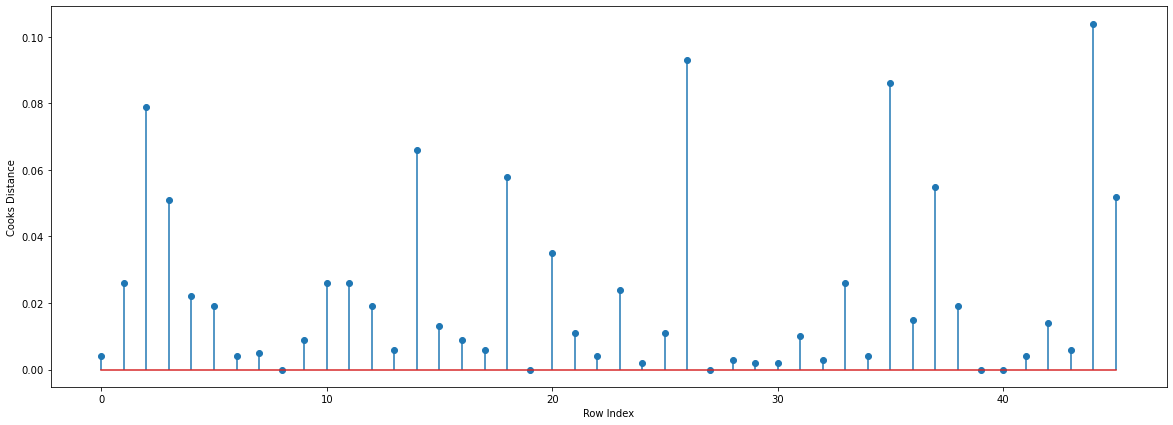

In [47]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(st_up_new2)),np.round(c_spr,3))
plt.xlabel('Row Index')
plt.ylabel("Cooks Distance")
plt.show()

In [48]:
(fin_sp_pr.rsquared,fin_sp_pr.aic)

(0.9655640253783063, 948.2727741852146)

In [49]:
st_up_new3 = st_up_new2.drop(st_up_new2.index[[44,26,14]]).reset_index()
st_up_new3

,index,Spend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
st_up_new4 = st_up_new3.drop(['index'],axis = 1)
st_up_new4

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
st_up_new4.shape

(43, 5)

In [52]:
fin = sfa.ols("Profit~Spend+MarketingSpend+Administration",data = st_up_new4).fit()

In [53]:
(fin.rsquared,fin.aic)

(0.9742628962920028, 875.0459415438053)

In [54]:
#NEW DATA FOR PREDICTION
id = pd.DataFrame({'Spend':1200,'Administration':1130.11,'MarketingSpend':2134.32},index=[1])
id

,Spend,Administration,MarketingSpend
1,1200,1130.11,2134.32


In [55]:
fin.predict(id)

1    55004.33274
dtype: float64

In [56]:
pred_st_up=fin.predict(st_up)

In [57]:
pred_st_up

0     192877.403356
1     189367.236634
2     182769.171291
3     174365.030210
4     172960.347534
5     164648.603071
6     157614.805563
7     160657.956773
8     152597.692107
9     155868.583925
10    136758.824096
11    137082.261433
12    130637.494107
13    129008.931516
14    150095.989431
15    147186.301049
16    119012.937458
17    131723.153448
18    130888.287188
19    115938.614465
20    119012.924660
21    119385.379081
22    117118.384721
23    112720.179609
24    115002.341131
25    103996.947715
26    111982.455526
27    117098.535972
28    103009.669191
29    103285.868177
30    101205.027137
31     99223.036376
32    100398.468281
33    100570.918187
34     91617.762774
35     93525.433770
36     78553.570283
37     92859.287221
38     73522.921657
39     86831.395200
40     77989.876223
41     78170.236726
42     73965.040441
43     63000.949891
44     67033.257181
45     50782.200625
46     60832.931225
47     49573.654668
48     52755.323143
49     51640.785079


In [59]:
from sklearn.metrics import classification_report as cr

In [61]:
rep = cr(st_up,pred_st_up)

TypeError: '<' not supported between instances of 'str' and 'float'